### Business Understanding
In the highly competitive streaming industry, platforms like Netflix, Amazon Prime, Hulu, and others aim to retain users and maximize user engagement by providing personalized content. A robust recommendation system is crucial for achieving this goal.

### Business Problem
Enhancing User Retention and Engagement through Personalized Recommendations

### objective
1. Increase User Engagement: By recommending movies that align with a user's preferences, the platform can encourage users to spend more time on the platform, thereby increasing engagement.

2. Improve User Retention: Personalized recommendations can lead to higher user satisfaction, reducing the churn rate and ensuring users stay subscribed to the service.

3. Drive Revenue Growth: Higher engagement and retention rates can lead to increased subscription renewals and potential upsells of premium services.

4. Competitive Advantage: Offering superior personalization compared to competitors can differentiate the platform, attracting more users.

### Key Performance Indicators (KPIs)

- User Engagement Metrics:
Average watch time per user,
Number of movies watched per user &
Frequency of user visits

- User Retention Metrics:
Monthly and yearly retention rates &
Churn rate

- Recommendation Performance Metrics:
Click-through rate (CTR) on recommended movies,
Conversion rate (proportion of recommendations that lead to a watch) &
Precision and recall of the recommendation system

### Stakeholders
1. Product Managers: Interested in the overall functionality and performance of the recommendation system.
2. Marketing Teams: Focus on using personalized recommendations to target users with relevant content.
3. Data Scientists and Engineers: Responsible for building, testing, and maintaining the recommendation system.
4. Executives: Concerned with how the recommendation system impacts business goals like user retention, engagement, and revenue.
Solution
### Collaborative Filtering-Based Recommendation System

1. User-Based Collaborative Filtering: Recommend movies based on the ratings and preferences of similar users.

2. Item-Based Collaborative Filtering (Optional): Recommend movies based on similarity between items (movies).

3. Hybrid Approach (Optional): Combine collaborative filtering with content-based filtering to address cold start problems and improve reccommendation

### Implementation Plan

- Data Collection and Preprocessing:
Gather user ratings data from the MovieLens dataset.
Clean and preprocess the data for analysis.

- Model Development:
 Develop a collaborative filtering model to generate personalized movie recommendations.
Optional: Enhance the model with a hybrid approach for improved accuracy.
- Evaluation:
 Evaluate the model using metrics like precision, recall, and RMSE.
Conduct A/B testing to compare the new recommendation system against existing methods.
- Deployment:
Integrate the recommendation system into the platform.
Create a user interface for users to rate movies and receive recommendations.

- Monitoring and Optimization:
 Continuously monitor the performance of the recommendation system.
Update and refine the model based on user feedback and new data.

### Challenges
1. Data Sparsity: Many users might rate only a few movies, leading to sparse user-item matrices.

2. Cold Start Problem: New users or movies with little to no ratings can be difficult to recommend.

3. Scalability: As the number of users and movies grows, ensuring the recommendation system remains efficient and responsive is crucial.

By addressing these challenges and focusing on the outlined objectives, the recommendation system can significantly enhance the user experience, leading to increased engagement, retention, and ultimately, revenue growth for the streaming platform.

In [3]:
# Import necessary libraries for data manipulation and numerical computations
import pandas as pd
import numpy as np

# Import machine learning libraries
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Import library for handling sparse matrices
from scipy.sparse import csr_matrix

# Import warnings library to manage warnings
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#load the datasets
ratings = pd.read_csv('Movies_datasets/ratings.csv', index_col = 0)
movies = pd.read_csv('Movies_datasets/movies.csv', index_col = 0)
links = pd.read_csv('Movies_datasets/links.csv', index_col = 0)



In [5]:
#checking the first and last rows in the ratings dataset
ratings

,movieId,rating,timestamp
userId,,,
1,1,4.0,964982703
1,3,4.0,964981247
1,6,4.0,964982224
1,47,5.0,964983815
1,50,5.0,964982931
...,...,...,...
610,166534,4.0,1493848402
610,168248,5.0,1493850091
610,168250,5.0,1494273047


In [6]:
#checking the first and last rows in the movies dataset
movies

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama


In [7]:
#checking the first and last rows in the links dataset
links

,imdbId,tmdbId
movieId,,
1,114709,862.0
2,113497,8844.0
3,113228,15602.0
4,114885,31357.0
5,113041,11862.0
...,...,...
193581,5476944,432131.0
193583,5914996,445030.0
193585,6397426,479308.0


In [8]:
file_paths = {
    'ratings': 'Movies_datasets/ratings.csv',
    'movies': 'Movies_datasets/movies.csv',
    'links': 'Movies_datasets/links.csv',
    'tags': 'Movies_datasets/tags.csv'  # Corrected the file name to 'tags.csv'
}

# Load the data
def load_data(file_paths):
    data = {}
    for name, path in file_paths.items():
        print(f'Loading {name} data csv file...')
        try:
            data[name] = pd.read_csv(path)
            print(f'{name} dataset loaded successfully from {path}\n')
        except FileNotFoundError:
            print(f'Error: The file \'{path}\' was not found.')
        except Exception as e:
            print(f'Error: An unexpected error occurred: {e}')
    return data

data = load_data(file_paths)

# Merge the data
def merge_data(data):
    try:
        print('Merging data on movieId...')
        merged_data = pd.merge(data['movies'], data['ratings'], on='movieId', how='left')
        merged_data = pd.merge(merged_data, data['tags'], on='movieId', how='left')
        merged_data = pd.merge(merged_data, data['links'], on='movieId', how='left')
        print('Data merged successfully\n')
        return merged_data
    except KeyError as e:
        print(f'Error: A KeyError occurred: {e}. Please ensure all DataFrames contain the column \'movieId\'.')
        return None

merged_data = merge_data(data)

# Get the shape of the merged DataFrame
def get_shape(merged_data):
    if merged_data is not None:
        rows, columns = merged_data.shape
        print(f'The merged DataFrame has {rows} rows and {columns} columns.\n')
    else:
        print('Error: No merged data available. Please call the merge_data() method first.')

get_shape(merged_data)

# Summarize the merged DataFrame info
def summarize_info(merged_data):
    print('Summarizing the merged DataFrame info')
    print('-------------------------------')
    if merged_data is not None:
        print(merged_data.info())
    else:
        print('Error: No merged data available. Please call the merge_data() method first.')

summarize_info(merged_data)

# Describe the merged DataFrame
def describe_data(merged_data):
    print('\nDescribing the merged DataFrame data')
    print('--------------------------------')
    if merged_data is not None:
        print(merged_data.describe())
    else:
        print('Error: No merged data available. Please call the merge_data() method first.')

describe_data(merged_data)

Loading ratings data csv file...
ratings dataset loaded successfully from Movies_datasets/ratings.csv

Loading movies data csv file...
movies dataset loaded successfully from Movies_datasets/movies.csv

Loading links data csv file...
links dataset loaded successfully from Movies_datasets/links.csv

Loading tags data csv file...
tags dataset loaded successfully from Movies_datasets/tags.csv

Merging data on movieId...
Data merged successfully

The merged DataFrame has 285783 rows and 11 columns.

Summarizing the merged DataFrame info
-------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285783 entries, 0 to 285782
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movieId      285783 non-null  int64  
 1   title        285783 non-null  object 
 2   genres       285783 non-null  object 
 3   userId_x     285762 non-null  float64
 4   rating       285762 non-null  float64
 5   timestamp_x 

In [9]:
merged_data.head()

,movieId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,964982703.0,336.0,pixar,1.139046e+09,114709,862.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,964982703.0,474.0,pixar,1.137207e+09,114709,862.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,964982703.0,567.0,fun,1.525286e+09,114709,862.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,847434962.0,336.0,pixar,1.139046e+09,114709,862.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,847434962.0,474.0,pixar,1.137207e+09,114709,862.0


In [10]:
#chacking the columns in the ratings dataset
ratings.columns

Index(['movieId', 'rating', 'timestamp'], dtype='object')

In [11]:
#checking the columns in the movies dataset
movies.columns

Index(['title', 'genres'], dtype='object')

In [12]:
#checking the columns in the links dataset
links.columns

Index(['imdbId', 'tmdbId'], dtype='object')

### Checking the Datasets

In [13]:
#checking the dataset information
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100836 entries, 1 to 610
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   rating     100836 non-null  float64
 2   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 3.1 MB


In [14]:
#checking the dataset information
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9742 entries, 1 to 193609
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   9742 non-null   object
 1   genres  9742 non-null   object
dtypes: object(2)
memory usage: 228.3+ KB


In [15]:
#checking the links dataset information
links.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9742 entries, 1 to 193609
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   imdbId  9742 non-null   int64  
 1   tmdbId  9734 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 228.3 KB


In [16]:
#previewing the datatypes in ratings dataframe
ratings.dtypes

movieId        int64
rating       float64
timestamp      int64
dtype: object

In [17]:
#previewing the datatypes in movies dataframe
movies.dtypes

title     object
genres    object
dtype: object

In [18]:
#previewing the datatypes in links dataframe
links.dtypes

imdbId      int64
tmdbId    float64
dtype: object

In [19]:
#Determining the no of records in our datasets
ratings.shape, movies.shape, links.shape


((100836, 3), (9742, 2), (9742, 2))

In [20]:
#summary of the data contained in ratings dataset
ratings.describe()

,movieId,rating,timestamp
count,100836.000000,100836.000000,1.008360e+05
mean,19435.295718,3.501557,1.205946e+09
std,35530.987199,1.042529,2.162610e+08
min,1.000000,0.500000,8.281246e+08
25%,1199.000000,3.000000,1.019124e+09
50%,2991.000000,3.500000,1.186087e+09
75%,8122.000000,4.000000,1.435994e+09
max,193609.000000,5.000000,1.537799e+09


In [21]:
#summary of the data contained in the movies dataset
movies.describe()

,title,genres
count,9742,9742
unique,9737,951
top,Emma (1996),Drama
freq,2,1053


In [22]:
#summary of the data contained in the links dataset
links.describe()

,imdbId,tmdbId
count,9.742000e+03,9734.000000
mean,6.771839e+05,55162.123793
std,1.107228e+06,93653.481487
min,4.170000e+02,2.000000
25%,9.518075e+04,9665.500000
50%,1.672605e+05,16529.000000
75%,8.055685e+05,44205.750000
max,8.391976e+06,525662.000000


In [23]:
#checking for the variance between the mean and the column rating
ratings['rating'].var()

1.086867214296347

In [24]:
#checking for unique values
movies['genres'].unique()


array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Children|Comedy', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Drama|Thriller',
       'Comedy|Crime', 'Action|Sci-Fi|Thriller',
       'Action|Comedy|Horror|Thriller', 'Comedy|Drama', 'Documentary',
       'Ac

### Data Cleaning


In [25]:
merged_data

,movieId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08,336.0,pixar,1.139046e+09,114709,862.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08,474.0,pixar,1.137207e+09,114709,862.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08,567.0,fun,1.525286e+09,114709,862.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08,336.0,pixar,1.139046e+09,114709,862.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08,474.0,pixar,1.137207e+09,114709,862.0
...,...,...,...,...,...,...,...,...,...,...,...
285778,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184.0,4.0,1.537109e+09,NaN,NaN,NaN,5476944,432131.0
285779,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184.0,3.5,1.537110e+09,NaN,NaN,NaN,5914996,445030.0
285780,193585,Flint (2017),Drama,184.0,3.5,1.537110e+09,NaN,NaN,NaN,6397426,479308.0
285781,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184.0,3.5,1.537110e+09,NaN,NaN,NaN,8391976,483455.0


In [26]:
# Define a regular expression pattern to extract title and year
pattern = r'(.*) \((\d{4})\)'

# Create 'release_year' and 'title' columns based on the pattern
merged_data[['title', 'release_year']] = merged_data['title'].str.extract(pattern)
    
# Convert 'release_year' to numeric (it might be extracted as strings)
merged_data['release_year'] = pd.to_numeric(merged_data['release_year']).astype('Int64')  

# Remove the parentheses from the title
merged_data['title'] =merged_data['title'].str.strip()


In [27]:
merged_data.head()

,movieId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y,imdbId,tmdbId,release_year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,964982703.0,336.0,pixar,1.139046e+09,114709,862.0,1995
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,964982703.0,474.0,pixar,1.137207e+09,114709,862.0,1995
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,964982703.0,567.0,fun,1.525286e+09,114709,862.0,1995
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,847434962.0,336.0,pixar,1.139046e+09,114709,862.0,1995
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,847434962.0,474.0,pixar,1.137207e+09,114709,862.0,1995


## Dropping further the unnesesary columns 

### How about changing some names for to be readable

#####  here is how we change

In [28]:
import pandas as pd

def rename_column(df, old_name, new_name):
    """
    Rename a column in a pandas DataFrame.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the column to rename.
    old_name (str): The current name of the column.
    new_name (str): The new name for the column.

    Returns:
    pd.DataFrame: The DataFrame with the renamed column.
    """
    df = df.rename(columns={old_name: new_name})
    return df

# Example usage:
# Assuming merged_data is your DataFrame
# merged_data = pd.read_csv('your_dataset.csv')
# Renaming the column
merged_data = rename_column(merged_data, 'userId-x', 'user_id')
print(merged_data.head())


   movieId      title                                       genres  userId_x  \
0        1  Toy Story  Adventure|Animation|Children|Comedy|Fantasy       1.0   
1        1  Toy Story  Adventure|Animation|Children|Comedy|Fantasy       1.0   
2        1  Toy Story  Adventure|Animation|Children|Comedy|Fantasy       1.0   
3        1  Toy Story  Adventure|Animation|Children|Comedy|Fantasy       5.0   
4        1  Toy Story  Adventure|Animation|Children|Comedy|Fantasy       5.0   

   rating  timestamp_x  userId_y    tag   timestamp_y  imdbId  tmdbId  \
0     4.0  964982703.0     336.0  pixar  1.139046e+09  114709   862.0   
1     4.0  964982703.0     474.0  pixar  1.137207e+09  114709   862.0   
2     4.0  964982703.0     567.0    fun  1.525286e+09  114709   862.0   
3     4.0  847434962.0     336.0  pixar  1.139046e+09  114709   862.0   
4     4.0  847434962.0     474.0  pixar  1.137207e+09  114709   862.0   

   release_year  
0          1995  
1          1995  
2          1995  
3       

In [29]:
rename_column(merged_data, 'userId-x', 'user_id')



,movieId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y,imdbId,tmdbId,release_year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08,336.0,pixar,1.139046e+09,114709,862.0,1995
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08,474.0,pixar,1.137207e+09,114709,862.0,1995
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08,567.0,fun,1.525286e+09,114709,862.0,1995
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08,336.0,pixar,1.139046e+09,114709,862.0,1995
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08,474.0,pixar,1.137207e+09,114709,862.0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...
285778,193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy,184.0,4.0,1.537109e+09,NaN,NaN,NaN,5476944,432131.0,2017
285779,193583,No Game No Life: Zero,Animation|Comedy|Fantasy,184.0,3.5,1.537110e+09,NaN,NaN,NaN,5914996,445030.0,2017
285780,193585,Flint,Drama,184.0,3.5,1.537110e+09,NaN,NaN,NaN,6397426,479308.0,2017
285781,193587,Bungo Stray Dogs: Dead Apple,Action|Animation,184.0,3.5,1.537110e+09,NaN,NaN,NaN,8391976,483455.0,2018


In [30]:
merged_data.drop(columns=['timestamp_x', 'timestamp_y', 'userId_y', 'tag','imdbId', 'tmdbId' ] , inplace=True)

merged_data.head()

,movieId,title,genres,userId_x,rating,release_year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,1995
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,1995
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,1995
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,1995
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,1995


In [31]:
merged_data

,movieId,title,genres,userId_x,rating,release_year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,1995
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,1995
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,1995
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,1995
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,1995
...,...,...,...,...,...,...
285778,193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy,184.0,4.0,2017
285779,193583,No Game No Life: Zero,Animation|Comedy|Fantasy,184.0,3.5,2017
285780,193585,Flint,Drama,184.0,3.5,2017
285781,193587,Bungo Stray Dogs: Dead Apple,Action|Animation,184.0,3.5,2018


In [32]:
#Checking null values in movies dataset
merged_data.isnull().sum()


movieId          0
title           20
genres           0
userId_x        21
rating          21
release_year    20
dtype: int64

In [33]:
merged_data['genres'] = merged_data['genres'].apply(lambda row: row.strip().lower().replace('|', ', '))
merged_data.head()

,movieId,title,genres,userId_x,rating,release_year
0,1,Toy Story,"adventure, animation, children, comedy, fantasy",1.0,4.0,1995
1,1,Toy Story,"adventure, animation, children, comedy, fantasy",1.0,4.0,1995
2,1,Toy Story,"adventure, animation, children, comedy, fantasy",1.0,4.0,1995
3,1,Toy Story,"adventure, animation, children, comedy, fantasy",5.0,4.0,1995
4,1,Toy Story,"adventure, animation, children, comedy, fantasy",5.0,4.0,1995


In [34]:
duplicates = merged_data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 184929


In [35]:
merged_data.drop_duplicates(inplace=True)

merged_data.reset_index(drop=True, inplace=True)
print(merged_data.duplicated().sum())

0


In [36]:
merged_data.dropna(subset=['rating', 'title'], inplace=True)
print(merged_data.isnull().sum())

movieId         0
title           0
genres          0
userId_x        0
rating          0
release_year    0
dtype: int64


In [37]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100818 entries, 0 to 100853
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   movieId       100818 non-null  int64  
 1   title         100818 non-null  object 
 2   genres        100818 non-null  object 
 3   userId_x      100818 non-null  float64
 4   rating        100818 non-null  float64
 5   release_year  100818 non-null  Int64  
dtypes: Int64(1), float64(2), int64(1), object(2)
memory usage: 5.5+ MB


###  Exploratory Data Analysis

Exploratory Data Analysis is an approach to analyse data to summarise their main characteristics and often with visual methods.

### Univariate Data Analysis

The term univariate analysis refers to the analysis of one variable. You can remember this because the prefix “uni” means “one.”

The purpose of univariate analysis is to understand the distribution of values for a single variable.

In [38]:
df= merged_data
df

,movieId,title,genres,userId_x,rating,release_year
0,1,Toy Story,"adventure, animation, children, comedy, fantasy",1.0,4.0,1995
1,1,Toy Story,"adventure, animation, children, comedy, fantasy",5.0,4.0,1995
2,1,Toy Story,"adventure, animation, children, comedy, fantasy",7.0,4.5,1995
3,1,Toy Story,"adventure, animation, children, comedy, fantasy",15.0,2.5,1995
4,1,Toy Story,"adventure, animation, children, comedy, fantasy",17.0,4.5,1995
...,...,...,...,...,...,...
100849,193581,Black Butler: Book of the Atlantic,"action, animation, comedy, fantasy",184.0,4.0,2017
100850,193583,No Game No Life: Zero,"animation, comedy, fantasy",184.0,3.5,2017
100851,193585,Flint,drama,184.0,3.5,2017
100852,193587,Bungo Stray Dogs: Dead Apple,"action, animation",184.0,3.5,2018


### Histogram

### Ratings dataset

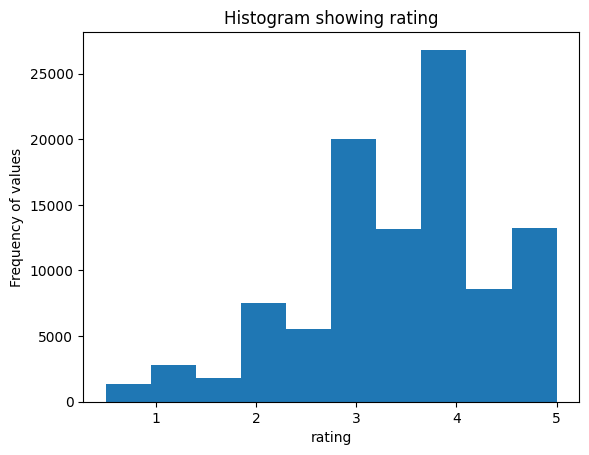

In [39]:
#Histrogram showing ratings
x=ratings['rating']
#when you are plotting the histogram,plt.hist(have the necessary parameters here)
plt.hist(x, bins=10, histtype='bar')
#when to give my plot a title
plt.title('Histogram showing rating')
plt.xlabel('rating')
plt.ylabel('Frequency of values')
plt.show()



The majority of ratings are clustered around the higher end of the scale, particularly around 4.0, indicating that users tend to rate movies positively. There are fewer low ratings, suggesting that either the movies are generally well-received, or users are more generous with their ratings. This kind of analysis is crucial for understanding user behavior and preferences, which is essential for building effective recommendation systems.

### Links dataset

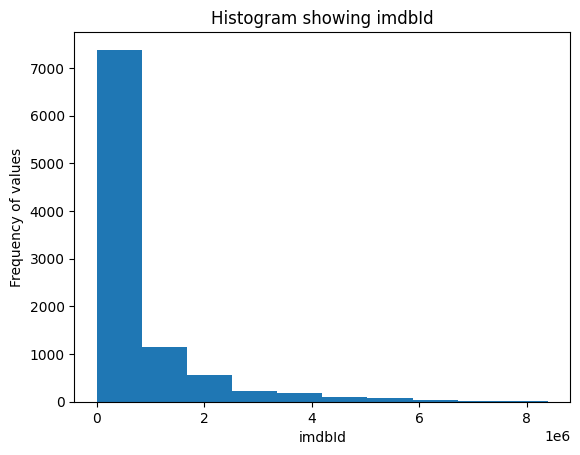

In [40]:
#Histrogram showing links
x=links['imdbId']
#when you are plotting the histogram,plt.hist(have the necessary parameters here)
plt.hist(x, bins=10, histtype='bar')
#when to give my plot a title
plt.title('Histogram showing imdbId')
plt.xlabel('imdbId')
plt.ylabel('Frequency of values')
plt.show()



The right-skewness of the distribution suggests that only a small proportion of movies have very high IMDb IDs, which could be more recent additions to the IMDb database.

### Movies dataset

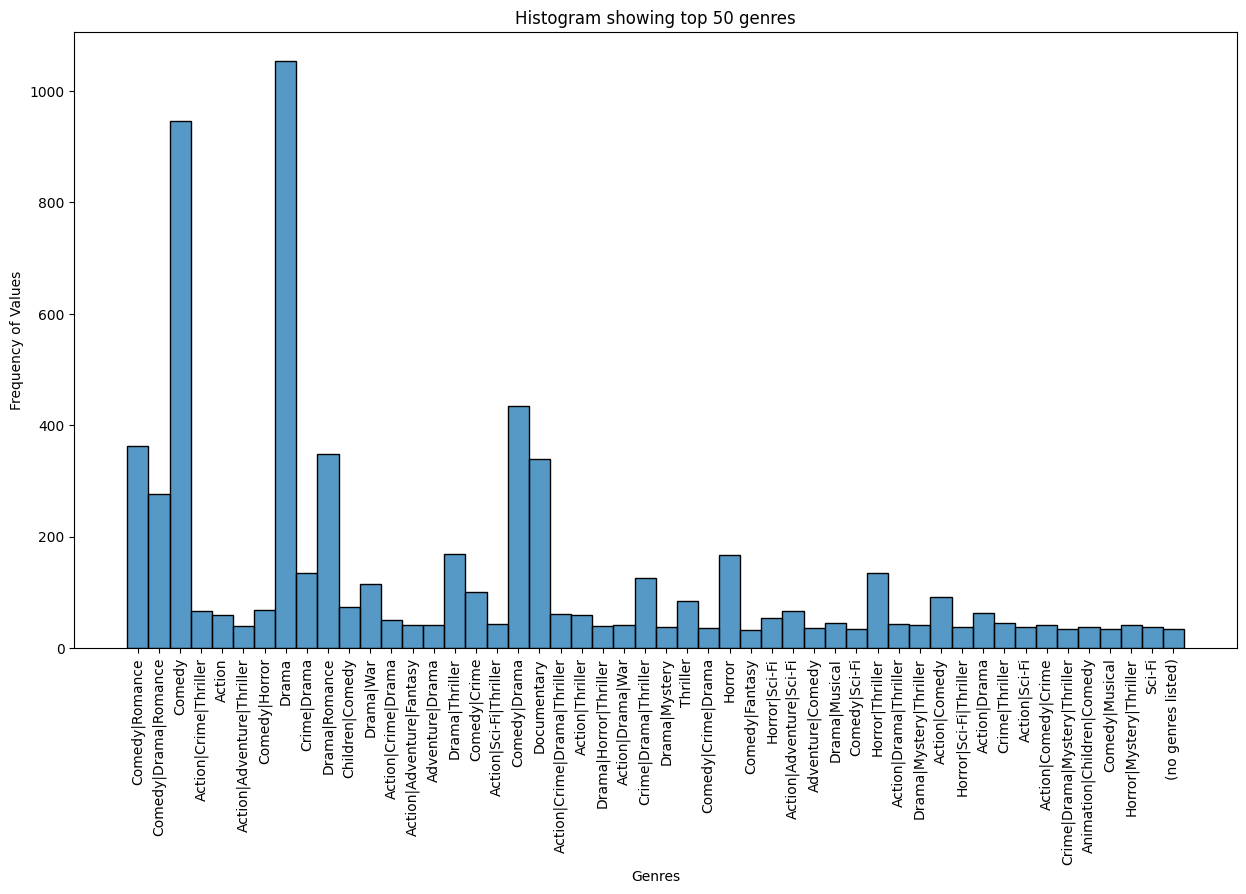

In [41]:


# Count the occurrences of each genre
genre_counts = movies['genres'].value_counts()

# Get the top 50 genres
top_50_genres = genre_counts.head(50).index

# Filter the DataFrame to include only the top 50 genres
filtered_df = movies[movies['genres'].isin(top_50_genres)]

# Plot the histogram
plt.figure(figsize=(15, 8))
sns.histplot(data=filtered_df, x='genres', discrete=True)
plt.xticks(rotation=90)
plt.title('Histogram showing top 50 genres')
plt.xlabel('Genres')
plt.ylabel('Frequency of Values')
plt.show()


the above histogram helps us analyse which genre has the highest frequency value, from the graph  drama followed by comedy have a high frequency value.

### Box Plot
### Ratings dataset

Text(0.5, 1.0, 'Distribution of timestamp')

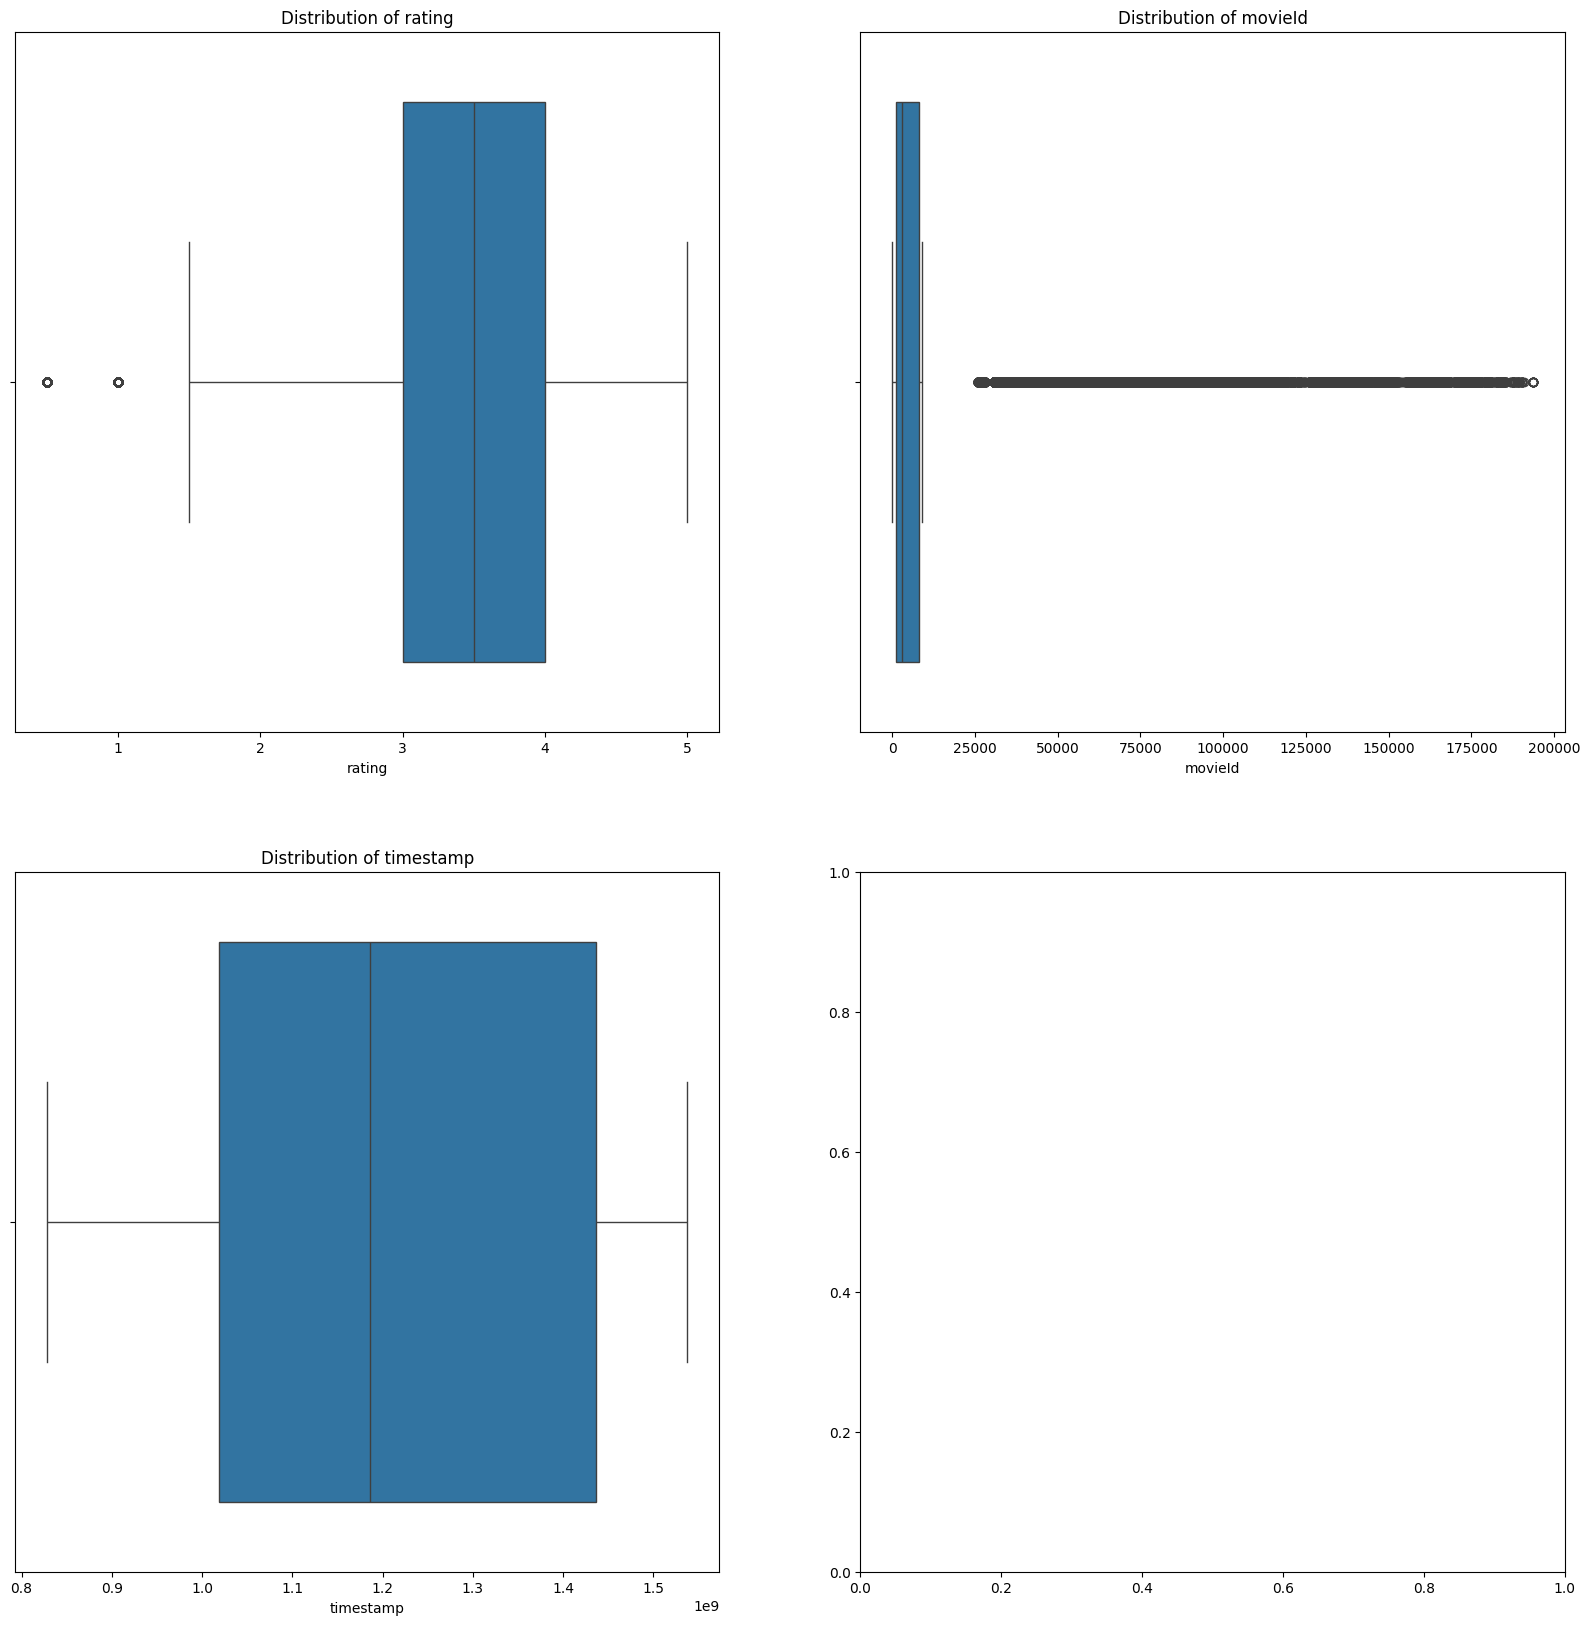

In [42]:
#Checking for anomalies and outliers in the ratings dataset
fig, ax = plt.subplots(2,2, figsize=[20,20])
sns.boxplot(x='rating', data=ratings, ax=ax[0,0])
sns.boxplot(x= 'movieId', data=ratings, ax=ax[0,1])
sns.boxplot(x='timestamp', data=ratings, ax=ax[1,0])


# Setting the Title of the Plots
ax[0,0].set_title("Distribution of rating")
ax[0,1].set_title("Distribution of movieId")
ax[1,0].set_title("Distribution of timestamp")


A boxplot displays the five-number summary of a set of data.
The five-number summary is the minimum, first quartile, median, third quartile, and maximum.

Box plots give a good graphical image of the concentration of the data. They also show how far the extreme values are from most of the data. from the data we an see the disribution of our values.


### Links dataset

Text(0.5, 1.0, 'Distribution of tmdbId')

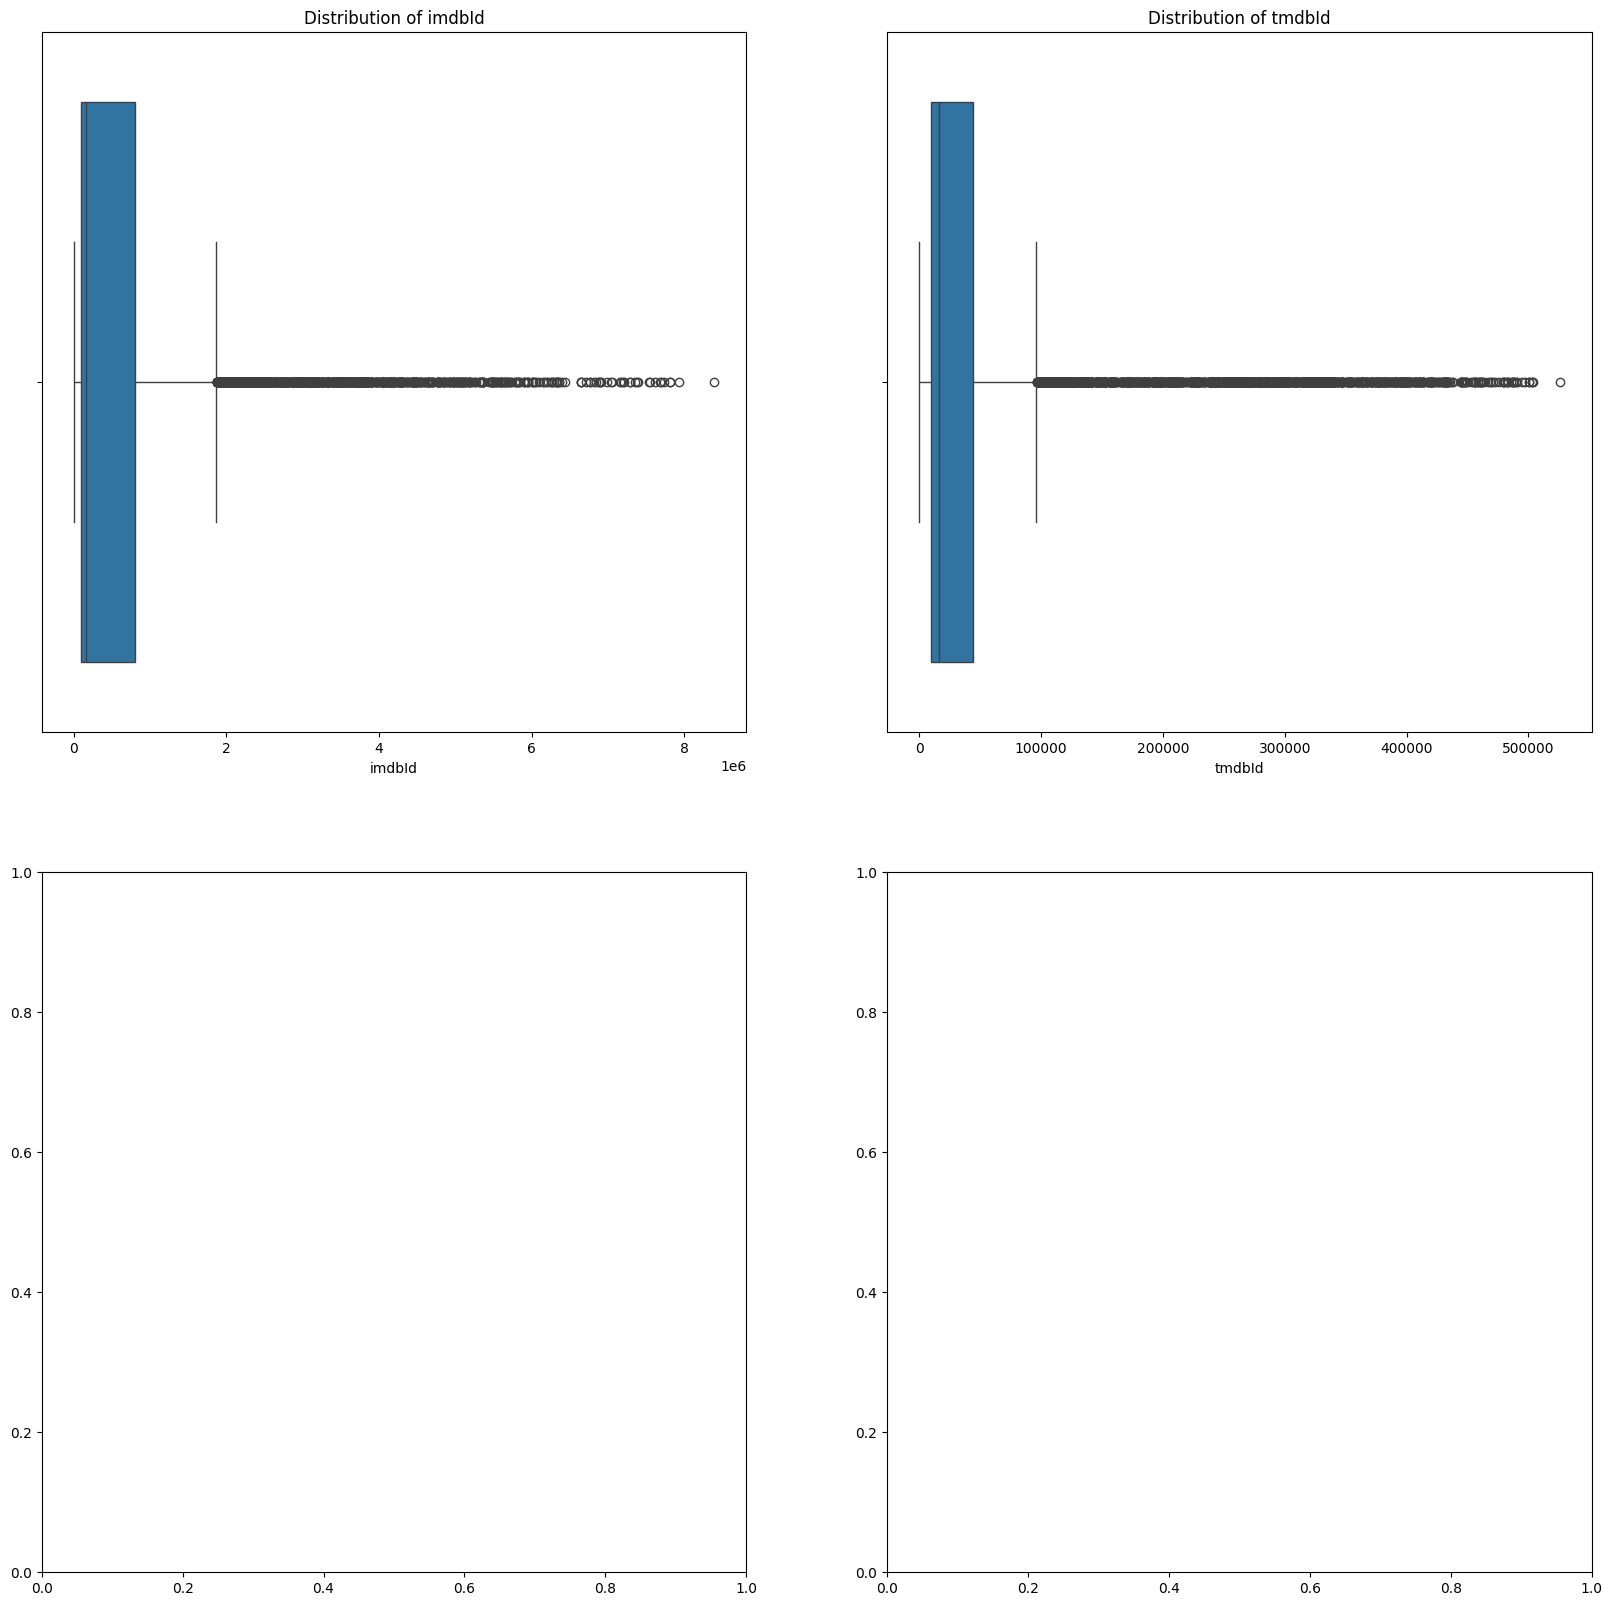

In [43]:
#Checking for anomalies and outliers in the links dataset
fig, ax = plt.subplots(2,2, figsize=[20,20])
sns.boxplot(x='imdbId', data=links, ax=ax[0,0])
sns.boxplot(x= 'tmdbId', data=links, ax=ax[0,1])



# Setting the Title of the Plots
ax[0,0].set_title("Distribution of imdbId")
ax[0,1].set_title("Distribution of tmdbId")



most of the values in the above  links dataset lie in the between the median and the maximum. it helps us identify outliers before modelling

## Bivariate

In [44]:
merged_data

,movieId,title,genres,userId_x,rating,release_year
0,1,Toy Story,"adventure, animation, children, comedy, fantasy",1.0,4.0,1995
1,1,Toy Story,"adventure, animation, children, comedy, fantasy",5.0,4.0,1995
2,1,Toy Story,"adventure, animation, children, comedy, fantasy",7.0,4.5,1995
3,1,Toy Story,"adventure, animation, children, comedy, fantasy",15.0,2.5,1995
4,1,Toy Story,"adventure, animation, children, comedy, fantasy",17.0,4.5,1995
...,...,...,...,...,...,...
100849,193581,Black Butler: Book of the Atlantic,"action, animation, comedy, fantasy",184.0,4.0,2017
100850,193583,No Game No Life: Zero,"animation, comedy, fantasy",184.0,3.5,2017
100851,193585,Flint,drama,184.0,3.5,2017
100852,193587,Bungo Stray Dogs: Dead Apple,"action, animation",184.0,3.5,2018


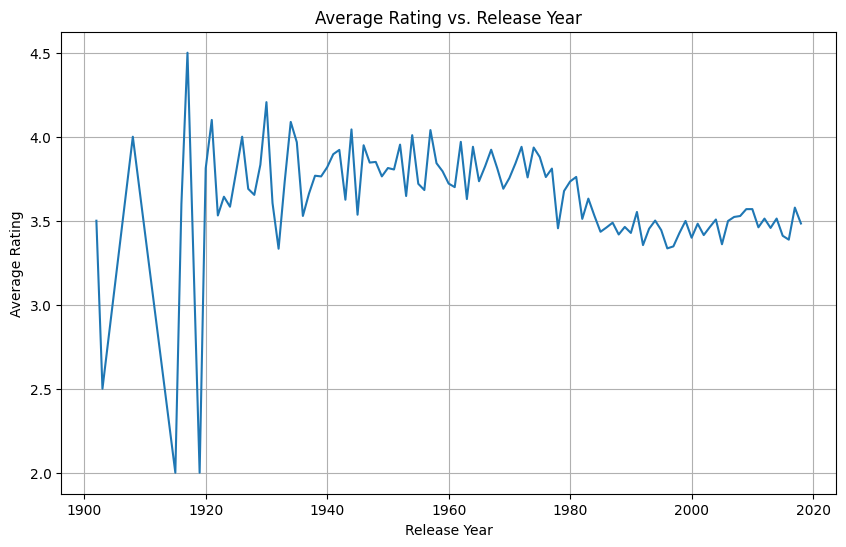

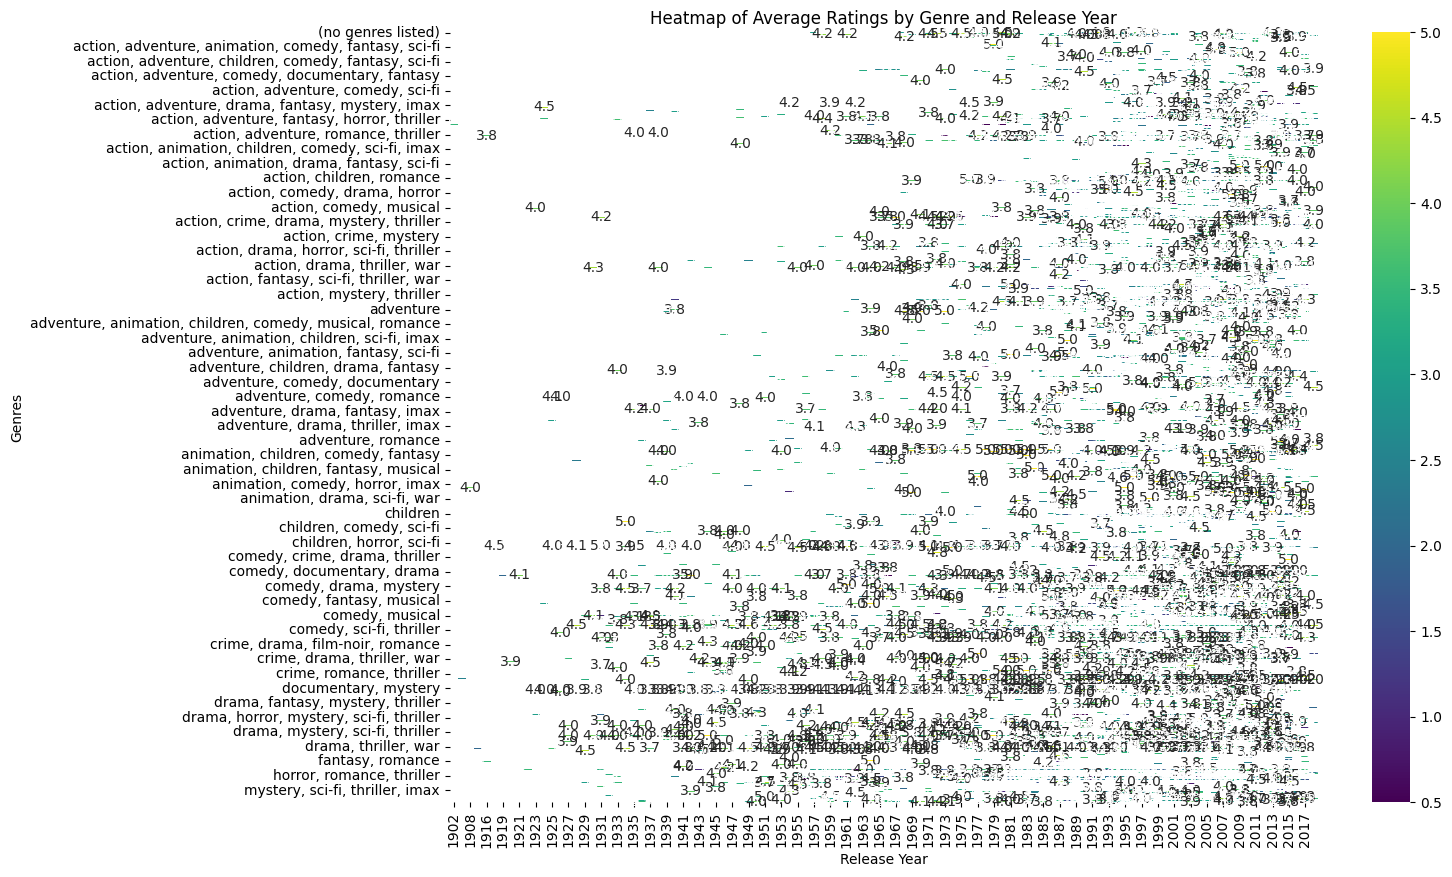

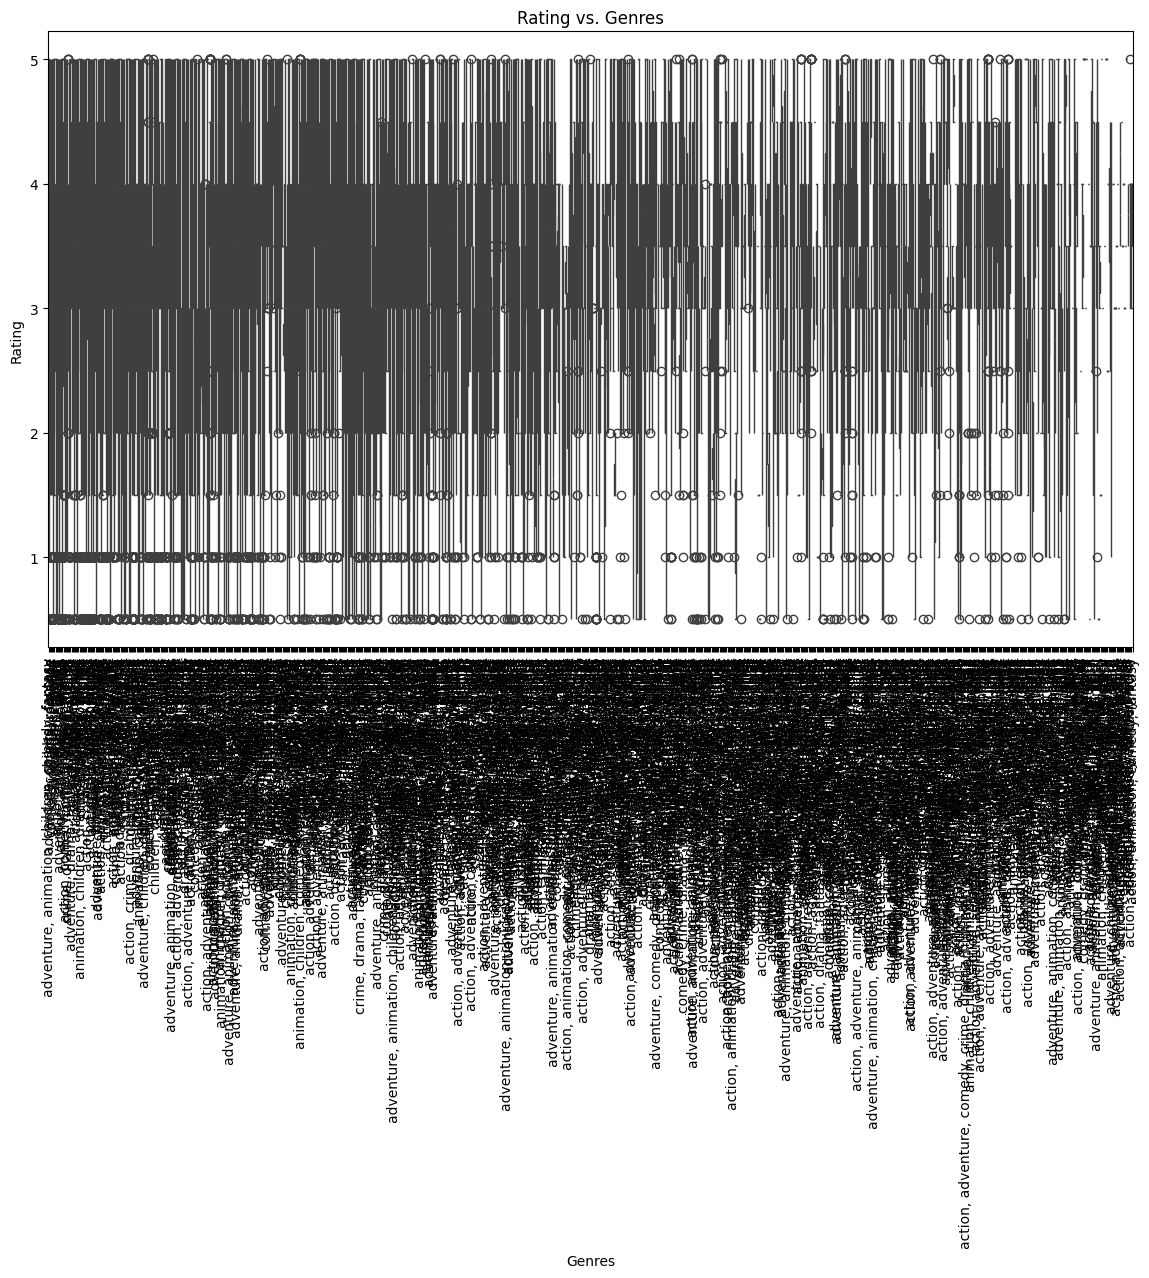

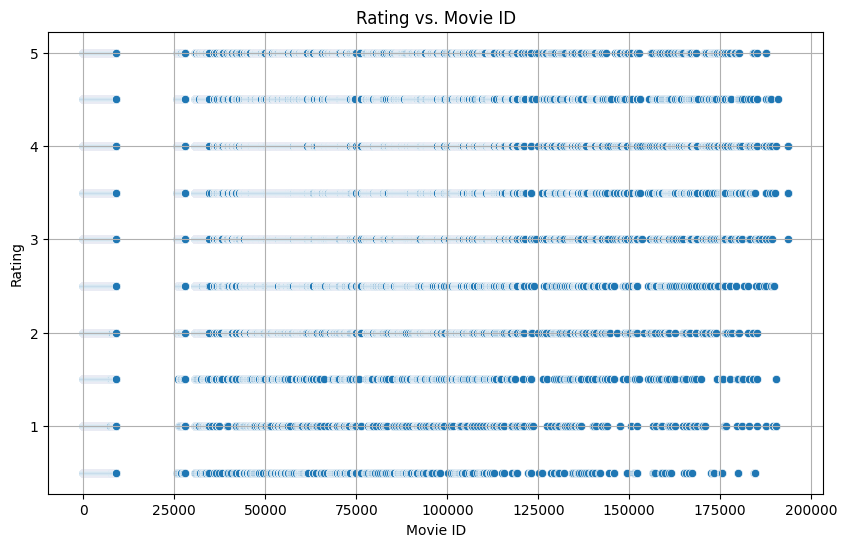

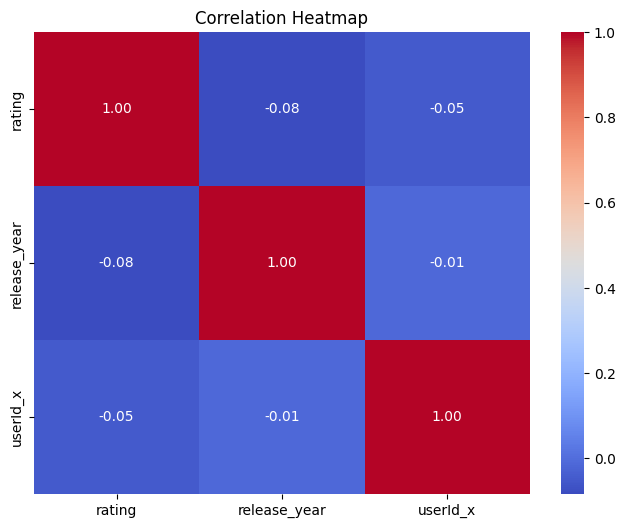

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded as shown in the provided image
df = merged_data

# 1. Line plot for average rating vs. release_year
plt.figure(figsize=(10, 6))
df.groupby('release_year')['rating'].mean().plot(kind='line')
plt.title('Average Rating vs. Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

# 2. Heatmap for ratings vs. genres
df_exploded = df.explode('genres')
genres_ratings_pivot = df_exploded.pivot_table(values='rating', index='genres', columns='release_year', aggfunc='mean')
plt.figure(figsize=(14, 10))
sns.heatmap(genres_ratings_pivot, cmap='viridis', annot=True, fmt=".1f")
plt.title('Heatmap of Average Ratings by Genre and Release Year')
plt.xlabel('Release Year')
plt.ylabel('Genres')
plt.show()

# 3. Box plot for rating vs. genres (already a great visualization, keeping it)
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_exploded, x='genres', y='rating')
plt.title('Rating vs. Genres')
plt.xlabel('Genres')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

# 4. Scatter plot for rating vs. movieId
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='movieId', y='rating')
plt.title('Rating vs. Movie ID')
plt.xlabel('Movie ID')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

# 5. Correlation heatmap for numerical variables
plt.figure(figsize=(8, 6))
correlation_matrix = df[['rating', 'release_year', 'userId_x']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Word cloud to make it abit intuitive



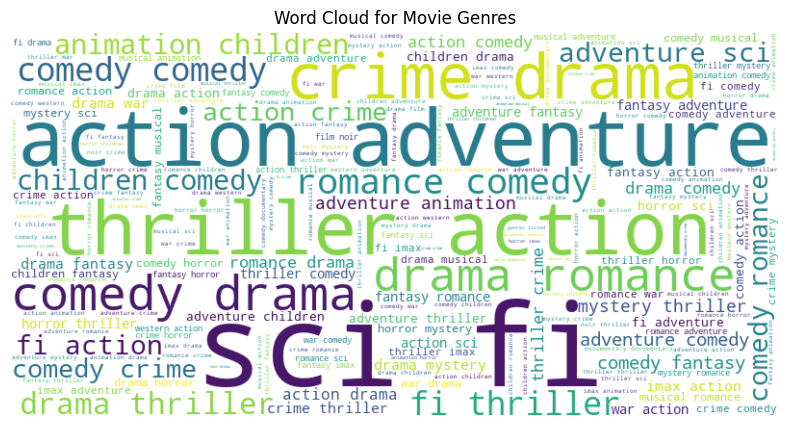

In [46]:
from wordcloud import WordCloud

# Generate a word cloud for movie genres
genre_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(merged_data['genres']))

plt.figure(figsize=(10, 5))
plt.imshow(genre_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Movie Genres')
plt.show()

Generaring the recommendation system

In [49]:
df['genres']

0         adventure, animation, children, comedy, fantasy
1         adventure, animation, children, comedy, fantasy
2         adventure, animation, children, comedy, fantasy
3         adventure, animation, children, comedy, fantasy
4         adventure, animation, children, comedy, fantasy
                               ...                       
100849                 action, animation, comedy, fantasy
100850                         animation, comedy, fantasy
100851                                              drama
100852                                  action, animation
100853                                             comedy
Name: genres, Length: 100818, dtype: object

In [50]:
df.shape

(100818, 6)

In [62]:
'''import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import sigmoid_kernel
import numpy as np

# Assuming merged_data is your DataFrame
# Replace 'your_dataframe' with your actual DataFrame name
merged = merged_data

# Filling NaNs with empty string and clean genres column
merged_data['genres'] = merged_data['genres'].fillna('').map(lambda x: ", ".join(x.split("|")))

# Initialize TfidfVectorizer
tfv = TfidfVectorizer(min_df=3, max_features=None, 
                      strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}',
                      ngram_range=(1, 3), stop_words='english')

# Fit and transform the genres column
tfv_matrix = tfv.fit_transform(merged_data['genres'])

# Reduce dimensionality using TruncatedSVD
svd = TruncatedSVD(n_components=100)  # Adjust n_components based on your needs
tfv_matrix_reduced = svd.fit_transform(tfv_matrix)

# Function to compute sigmoid kernel in batches
def batch_sigmoid_kernel(X, batch_size=100):
    n_samples = X.shape[0]
    sigmoid_kernel_matrix = np.zeros((n_samples, n_samples))
    
    for i in range(0, n_samples, batch_size):
        for j in range(0, n_samples, batch_size):
            X_batch = X[i:i+batch_size]
            Y_batch = X[j:j+batch_size]
            sigmoid_kernel_matrix[i:i+batch_size, j:j+batch_size] = sigmoid_kernel(X_batch, Y_batch)
    
    return sigmoid_kernel_matrix

# Compute the sigmoid kernel in batches
sig = batch_sigmoid_kernel(tfv_matrix_reduced)

# Check the shape of the resulting kernel matrix
print(sig.shape)'''


def popularity_recommendation(data, top_n=10):
    popular_movies = data.groupby('title')['rating'].mean().sort_values(ascending=False).head(top_n)
    return popular_movies.index.tolist()

popular_movies = popularity_recommendation(merged_data)
print("Top Popular Movies:", popular_movies)



Top Popular Movies: ['Formula of Love', 'Down Argentine Way', 'Mother (Madeo)', 'Light Years (Gandahar)', 'Tokyo Tribe', 'Hunting Elephants', 'Big Top Scooby-Doo!', "Into the Forest of Fireflies' Light", 'Goodbye Charlie', 'Eichmann']


In [65]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

def user_user_recommendation(data, user_id, top_n=10):
    # Create a pivot table
    user_movie_ratings = data.pivot_table(index='userId_x', columns='title', values='rating').fillna(0)
    knn = NearestNeighbors(metric='cosine', algorithm='brute')
    knn.fit(user_movie_ratings)
    
    user_index = user_movie_ratings.index.get_loc(user_id)
    distances, indices = knn.kneighbors(user_movie_ratings.iloc[user_index, :].values.reshape(1, -1), n_neighbors=top_n+1)
    
    recommendations = []
    for i in range(1, len(distances.flatten())):
        # Get the index of the neighbor user
        neighbor_user_index = indices.flatten()[i]
        
        # Get the movie titles rated by the neighbor user
        neighbor_user_ratings = user_movie_ratings.iloc[neighbor_user_index]
        
        # Get the titles of movies that the neighbor user rated highly (e.g., rating >= 4)
        highly_rated_movies = neighbor_user_ratings[neighbor_user_ratings >= 4].index.tolist()
        
        # Add these movies to the recommendations list
        recommendations.extend(highly_rated_movies)
    
    # Remove duplicates and movies already rated by the user
    user_rated_movies = user_movie_ratings.loc[user_id][user_movie_ratings.loc[user_id] > 0].index.tolist()
    recommendations = list(set(recommendations) - set(user_rated_movies))
    
    return recommendations[:top_n]

user_recommendations = user_user_recommendation(merged_data, user_id=1)
print("User-User Recommendations:", user_recommendations)


User-User Recommendations: ['Night of the Living Dead', 'Brokeback Mountain', 'Conversation, The', 'Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan', 'Sideways', 'Batman Forever', 'Chicken Run', 'Weather Man, The', 'Laura', 'Man with Two Brains, The']


In [70]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

def item_item_recommendation(data, movie_title, top_n=10):
    # Create a pivot table
    movie_user_ratings = data.pivot_table(index='title', columns='userId_x', values='rating').fillna(0)
    knn = NearestNeighbors(metric='cosine', algorithm='brute')
    knn.fit(movie_user_ratings)
    
    movie_index = movie_user_ratings.index.get_loc(movie_title)
    distances, indices = knn.kneighbors(movie_user_ratings.iloc[movie_index, :].values.reshape(1, -1), n_neighbors=top_n+1)
    
    recommendations = []
    for i in range(1, len(distances.flatten())):
        idx = indices.flatten()[i]
        recommendations.append(movie_user_ratings.index[idx])
    
    return recommendations

item_recommendations = item_item_recommendation(merged_data, movie_title='Toy Story')
print("Item-Item Recommendations:", item_recommendations)


Item-Item Recommendations: ['Toy Story 2', 'Jurassic Park', 'Independence Day (a.k.a. ID4)', 'Star Wars: Episode IV - A New Hope', 'Forrest Gump', 'Lion King, The', 'Star Wars: Episode VI - Return of the Jedi', 'Mission: Impossible', 'Groundhog Day', 'Back to the Future']


In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

def content_based_recommendation(data, movie_title, top_n=10):
    tfv = TfidfVectorizer(min_df=3, max_features=5000,  # Limit the number of features
                          strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}',
                          ngram_range=(1, 3), stop_words='english')

    tfv_matrix = tfv.fit_transform(data['genres'])

    cosine_sim = linear_kernel(tfv_matrix, tfv_matrix)

    indices = pd.Series(data.index, index=data['title']).drop_duplicates()

    idx = indices[movie_title]

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    movie_indices = [i[0] for i in sim_scores]

    return data['title'].iloc[movie_indices].tolist()

content_recommendations = content_based_recommendation(merged_data, movie_title='Toy Story')
print("Content-Based Recommendations:", content_recommendations)


MemoryError: Unable to allocate 39.4 GiB for an array with shape (5289181904,) and data type int64

In [53]:
tfv_matrix = tfv.fit_transform(merged_data['genres'])
tfv_matrix

<100818x521 sparse matrix of type '<class 'numpy.float64'>'
	with 591471 stored elements in Compressed Sparse Row format>

In [54]:
# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

MemoryError: Unable to allocate 39.4 GiB for an array with shape (5289181904,) and data type int64